In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

---
Le jeu de données utilisé est le “Wikipédia Language Identification Database” qui contient plus de 200 000 paragraphes dans 235 langues. 

# Load & explore data (labels)

In [2]:
y_test = pd.read_csv('data/y_test.txt', header=None)


### Basic exploration

In [3]:
y_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117500 entries, 0 to 117499
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   0       117000 non-null  object
dtypes: object(1)
memory usage: 918.1+ KB


In [4]:
y_test.describe()

,0
count,117000
unique,234
top,bjn
freq,500


### Let's check the number of languages included in this dataset

In [5]:
y_test.nunique()

0    234
dtype: int64

> The dataset is expedted to include 235 languages, but there is only 234

#### Let's see if we can spot the missing language

In [6]:
labels = pd.read_csv("data/labels.csv", sep=';')

In [7]:
for i, l in enumerate(labels['Label']):
    if l not in y_test[0].unique():
        print(i, l)

142 nan


In [8]:
labels.iloc[142]

Label                          NaN
English            Min Nan Chinese
Wiki Code               zh-min-nan
ISO 369-3                      NaN
German                     Min Nan
Language family       Sino-Tibetan
Writing system                 NaN
Remarks                        NaN
Synonyms                       NaN
Name: 142, dtype: object

### Let's check the repartition of the text samples among the languages

In [9]:
y_test.value_counts()

ace    500
pam    500
new    500
nld    500
nno    500
      ... 
ido    500
ile    500
ilo    500
ina    500
zho    500
Length: 234, dtype: int64

In [10]:
y_test.value_counts().describe()

count    234.0
mean     500.0
std        0.0
min      500.0
25%      500.0
50%      500.0
75%      500.0
max      500.0
dtype: float64

In [11]:
500*234

117000

> So there is definitly 500 texts per language, and 234 languages in this dataset.

#### We can also check with a graph...

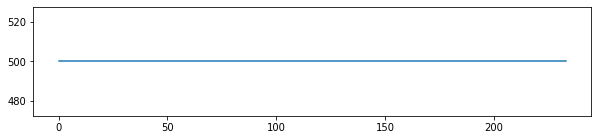

In [12]:
fig = plt.figure(figsize=(10, 2))

y_test_vc = y_test.value_counts()

plt.plot([x for x in range(y_test_vc.shape[0])], y_test_vc)
plt.show()

---

# Select `text id`s  (row index) for the top 5 languages

According to wikipedia (https://en.wikipedia.org/wiki/List_of_languages_by_number_of_native_speakers), the top 5 `languages by number of native speakers` are:
- 1 Mandarin Chinese (12.3%)
- 2 Spanish (6.0%)
- 3 English (5.1%)
- 3 Arabic (5.1%)
- 5 Hindi (3.5%)

According to babbel.com (https://www.babbel.com/en/magazine/the-10-most-spoken-languages-in-the-world), the top 5 `spoken languages` are: 
- 1 Mandarin Chinesse (1100M)
- 2 Spanish (471M)
- 3 English (370M)
- 4 Hindi (342M)
- 5 Arabic (315M)

### Identify the `Labels` for the 5 selected languages

In [13]:
top_languages = ["Standard Chinese", "Spanish", "English", "Arabic", "Hindi"]
labels[labels.English.isin(top_languages)][['Label', 'English']]

,Label,English
5,ara,Arabic
50,eng,English
76,hin,Hindi
190,spa,Spanish
234,zho,Standard Chinese


### Search for the rows matching the selected language's codes

In [14]:
top_labels = list(labels[labels.English.isin(top_languages)][['Label', 'English']]['Label'])
top_labels

['ara', 'eng', 'hin', 'spa', 'zho']

In [15]:
y_select = y_test.loc[ y_test.isin(top_labels)[0] ]
y_select.shape

(2500, 1)

### Select some of them
(the same number for each selected language)

In [16]:
sample_size = 50

In [17]:
y_selects = {}
for lang in top_labels:
    y_selects[lang] = y_test.loc[ y_test[0] == lang ][:sample_size].index
y_selects

{'ara': Int64Index([   15,   134,   232,  1039,  1184,  1221,  1415,  2211,  2409,
              2498,  2733,  2816,  2946,  3535,  3728,  3788,  4288,  4523,
              4748,  5008,  5225,  5504,  5552,  5693,  5770,  5834,  6058,
              6111,  6141,  6275,  6490,  6544,  6560,  6628,  6683,  7095,
              7560,  8615,  8865,  9102,  9366, 10060, 10597, 11176, 12129,
             12611, 12639, 13419, 13870, 13904],
            dtype='int64'),
 'eng': Int64Index([   68,   384,   751,  1508,  1527,  1754,  2533,  2667,  2722,
              3063,  3217,  3476,  3509,  3533,  3699,  3786,  4276,  4702,
              5000,  5169,  5346,  5371,  5775,  6090,  6203,  6489,  6491,
              6650,  6795,  7068,  7240,  7406,  7702,  7894,  7962,  8148,
              8367,  8452,  8551,  8979,  9592, 10107, 10593, 10719, 10743,
             10867, 11527, 11765, 11809, 12229],
            dtype='int64'),
 'hin': Int64Index([  113,   352,   590,   663,   957,   967,  1588,  21

### Collect the inputs from x_test.txt
(using the selected index)

In [18]:
from collections import defaultdict

In [19]:
count_items = 0
count_collect = 0
lines = defaultdict(lambda: [])

with open('data/x_test.txt', 'r') as file:
    for line in file.readlines():
        for lang in top_labels:
            if count_items in y_selects[lang]:
                #print(f"Line {count} collected")
                lines[lang].append(line)
                count_collect += 1
        count_items +=1
    print(f"There are {count_items} lines and {count_collect} of them were collected.")

There are 117500 lines and 250 of them were collected.


#### Let's print some of them

In [20]:
for l in [*lines['spa'][:3], *lines['hin'][:3], *lines['zho'][:3]]:
    print(l)

La ciudad de San Cristóbal es sede del Hospital General Docente "Comandante Pinares". Con más de 400 camas, este moderno Hospital brinda servicios a todo el oeste de la Provincia de Artemisa.

2014 debía de ser la temporada de la consagración de Elissonde, pero no fue así. Comenzó su temporada de nuevo en el Tour de Omán pero no repitió el éxito del año pasado, y esta vez fue 21.º en la clasificación general final. En el Tour de l'Ain en el que el año pasado se llevó la clasificación de los jóvenes, solo puso ser 13.º.

En su travesía se encuentran con Gaff, un robot nómada, guardián de la familia Eón, cuya misión es proteger al Puño, a los miembros del clan Eón, e impedir que el cuerpo robot del malvado General se reconstruya en algún laboratorio secreto y lejano. En compañía de Ally, Marty emprende entonces un largo camino de instrucción y desarrollo propio del único ser humano capaz de desarrollar los heroicos planes que la familia Eón le tenía reservados, en donde, de a poco, se va

# Azure Translator

In [21]:
valid_answer_labels = {
    'zho' : ['lzh', 'zh-Hans', 'zh-Hant'],
    'eng' : ['en'],
    'spa' : ['es'],
    'ara' : ['ar'],
    'hin' : ['hi'],
    'fra' : ['fr', 'fr-ca'],
}

### Format inputs to match translator API requierements

In [22]:
max_batch_size = 100
max_characters = 50000

inputs = defaultdict(lambda:[])
for lang in top_labels:
    count_chars = 0
    
    for line in lines[lang]:
        
        count_chars += len(line)
        if(count_chars > max_characters):
            print("Too long")
        
        inputs[lang].append({'text':line})
        
        if len(inputs[lang]) == max_batch_size:
            break
            
    print(f"total chars for {lang}: {count_chars}")
        
for lang in top_labels:
        print(f"{lang} --> {len(inputs[lang])}")

total chars for ara: 23742
total chars for eng: 20382
total chars for hin: 21348
total chars for spa: 23547
total chars for zho: 11348
ara --> 50
eng --> 50
hin --> 50
spa --> 50
zho --> 50


### Call the API

#### Load API `subscription_key` and `endpoint` from `non commited file`

In [23]:
with open("secrets.txt", "r") as secrets:
    subscription_key = secrets.readline().strip()
    endpoint = secrets.readline().strip()

#### Prepare request to API

In [24]:
import requests, uuid, json

location = "francecentral"
path = '/detect'
constructed_url = endpoint + path

params = {'api-version': '3.0'}

headers = {
    'Ocp-Apim-Subscription-Key': subscription_key,
    'Ocp-Apim-Subscription-Region': location,
    'Content-type': 'application/json',
    'X-ClientTraceId': str(uuid.uuid4())
}

#### Send a batch of texts per language to the API

In [25]:
responses = {}
for lang in top_labels:
    body = inputs[lang]
    request = requests.post(constructed_url, params=params, headers=headers, json=body)
    responses[lang] = request.json()

## Prepare results for analysis

#### Convert to Pandas DataFrame for ease of use

In [26]:
results = pd.DataFrame()
for lang in top_labels:
    response = pd.DataFrame(responses[lang])
    response['label'] = lang
    results = pd.concat([results, response])
results

,language,score,isTranslationSupported,isTransliterationSupported,alternatives,label
0,ar,1.00,True,True,NaN,ara
1,ar,1.00,True,True,NaN,ara
2,ar,1.00,True,True,NaN,ara
3,ar,1.00,True,True,NaN,ara
4,ar,0.97,True,True,NaN,ara
...,...,...,...,...,...,...
45,zh-Hant,1.00,True,True,NaN,zho
46,zh-Hans,0.99,True,True,NaN,zho
47,zh-Hant,1.00,True,True,NaN,zho
48,zh-Hans,0.97,True,True,NaN,zho


#### Remove useless (in this context) columns in order to improve readability

In [27]:
results = results.drop(['isTranslationSupported','isTransliterationSupported', 'alternatives'], axis='columns')

#### Add a new columns indicating wether or not the predicted label match the known label

In [28]:
for i, r in results.iterrows():
    results['isOk'] = r['language'] in valid_answer_labels[ r['label'] ]
results

,language,score,label,isOk
0,ar,1.00,ara,True
1,ar,1.00,ara,True
2,ar,1.00,ara,True
3,ar,1.00,ara,True
4,ar,0.97,ara,True
...,...,...,...,...
45,zh-Hant,1.00,zho,True
46,zh-Hans,0.99,zho,True
47,zh-Hant,1.00,zho,True
48,zh-Hans,0.97,zho,True


# Compute scores 

### overall scores

In [29]:
average_azure_score = results['score'].mean()
average_azure_score

0.9874400000000001

In [30]:
average_local_score = np.sum(results['isOk']) / len(results)
average_local_score

1.0

### scores per language

In [33]:
average_azure_scores_lang = {}

for lang in top_labels:
    lang_results = results[ results['label'] == lang]
    average_azure_score_lang = lang_results['score'].mean()
    average_azure_scores_lang[lang] = average_azure_score_lang
    print(f"{lang} -> {average_azure_score_lang:.3f}")

ara -> 0.986
eng -> 0.988
hin -> 0.988
spa -> 0.986
zho -> 0.990


In [34]:
average_local_scores_lang = {}

for lang in top_labels:
    lang_results = results[ results['label'] == lang]
    average_local_score_lang = np.sum( lang_results['isOk']) / len( lang_results )
    average_local_scores_lang[lang] = average_local_score_lang
    print(f"{lang} -> {average_local_score_lang:.3f}")

ara -> 1.000
eng -> 1.000
hin -> 1.000
spa -> 1.000
zho -> 1.000


### display scores

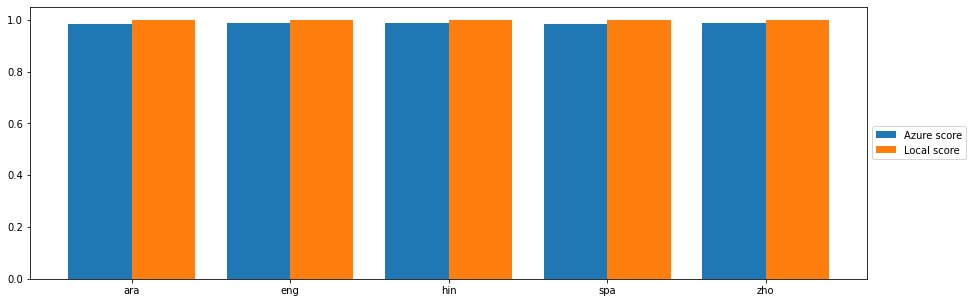

In [68]:
fig = plt.figure(figsize=(15, 5))


# Position of bars on x-axis
ind = np.arange(5)
width = 0.4  

plt.bar(ind, average_azure_scores_lang.values(), width, label="Azure score")
plt.bar(ind+width, average_local_scores_lang.values(), width, label="Local score")
plt.xticks(ind + width / 2, (average_azure_scores_lang.keys()))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

# Conclusion

Azure translator has several advantages:
- The pre-trained model has a very good accuracy on the 5 selected languages (no error detected).
- The response latency is quite good (less than 300 ms on average according to Azure Monitoring section).
- The translator module can detect the language for up to 67 different languages.
- The model offers alternative languages when unsure of the result.
- The model can be fined-tuned for special contexts if needed (it's more expensive).

However, the following limitations apply:
- The array can have at most 100 elements.
- The entire text included in the request cannot exceed 50,000 characters including spaces.
- The price depends on the number of characters (€8.998 per million chars of standard translation with a standard S1 instance)

Azure also have other interesting points:
- The data sent to the Azure API are not permanently stored https://www.microsoft.com/en-us/translator/business/notrace/
- The model is pre-trained (we don't need to train and fine-tune the model)
- The model is kept up-to-date by the Microsoft team (no Datadrift problems)
- The model is hosted in the cloud, so the price includes the hosting/servers/access prices.
- The model can be easily deployed world-wide.